### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 

In [3]:
tour = pd.read_csv(r'C:\Users\user\Desktop\Travel package project\tour_package_prediction - tour_package_prediction.csv')

### Dataset link : [Tour Package Data](https://drive.google.com/file/d/1DEM63ENqHREzylG6HCA_t9z7QL90ym-y/view)

In [4]:
tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
tour.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
tour.shape

(4888, 20)

In [7]:
print('Columns : ', tour.shape[1])
print('Rows : ', tour.shape[0])

Columns :  20
Rows :  4888


In [8]:
print(tour.info())
print('\n\n\n', 'Description:- \n',tour.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
tour.duplicated().sum()

0

In [10]:
# Dropping Customer ID
tour.drop(['CustomerID'], axis=1, inplace=True)

In [11]:
tour.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
#cleaning gender column
tour['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [13]:
tour['Gender'] = tour['Gender'].apply(lambda a: 'Female' if a == 'Fe Male' else a)

In [14]:
tour['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [15]:
def null (tour):
    print('Missing values and missing value percentage of each column :')
    null_data = tour.isnull().sum().sort_values(ascending=False)
    null_percent = round(tour.isnull().sum()*100/tour.isnull().count(),4).sort_values(ascending=False)
    missing_values = pd.concat([null_data, null_percent], axis=1, keys=['Null_values', 'Missing_Percent'])
    return missing_values

null(tour)

Missing values and missing value percentage of each column :


,Null_values,Missing_Percent
DurationOfPitch,251,5.1350
MonthlyIncome,233,4.7668
Age,226,4.6236
NumberOfTrips,140,2.8642
NumberOfChildrenVisiting,66,1.3502
NumberOfFollowups,45,0.9206
PreferredPropertyStar,26,0.5319
TypeofContact,25,0.5115
Designation,0,0.0000
OwnCar,0,0.0000


### We will check for outliers before treating the missing data, to know whether the particular feature is symmetrically distributed or skewed. This step helps whether to fill the missing values using mean or not as outliers have an impact on the mean significantly.

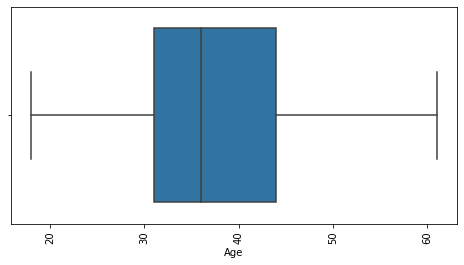

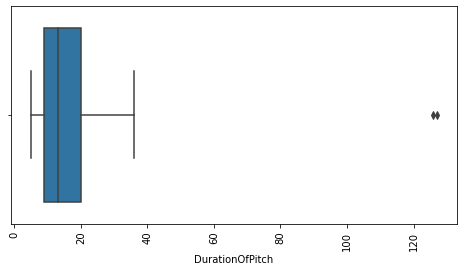

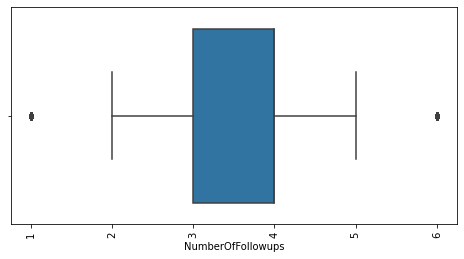

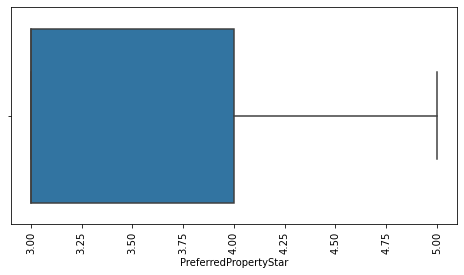

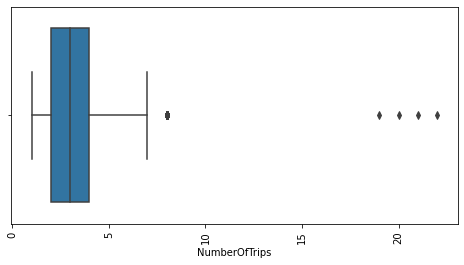

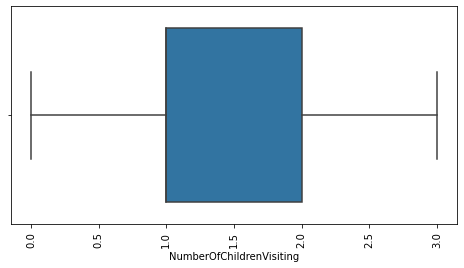

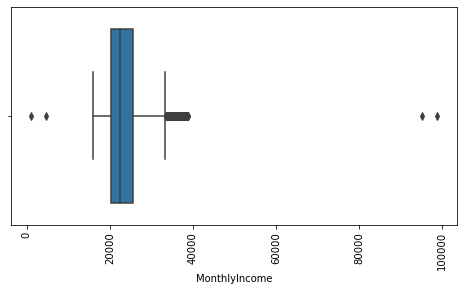

In [16]:
data = tour[['Age', 'DurationOfPitch', 'NumberOfFollowups','PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']]
for i in data.columns:
             plt.figure(figsize=(8,4))
             sns.boxplot(data[i])
             plt.xticks(rotation = 90)
             plt.show()

## Treating Missing Values

Skewness :-  0.38298868373855377


<Figure size 1080x432 with 0 Axes>

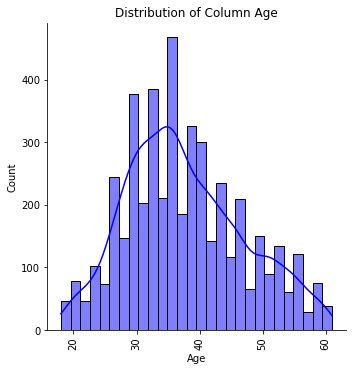

In [17]:
# Treating missing values of age column

print('Skewness :- ',tour['Age'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['Age'], kde=True, color='b')
plt.xticks(rotation = 90)
plt.title('Distribution of Column Age')
plt.show()

- Age column is almost normally distributed
- So we can go ahead and fill the missing data with mean

In [18]:
# Imputing the missing values of age column with mean
tour['Age'] = tour['Age'].fillna(tour['Age'].mean())
print('Missing Values in Age column :- ',tour['Age'].isnull().sum())

Missing Values in Age column :-  0


Skewness :-  -0.37271939892913725


<Figure size 1080x432 with 0 Axes>

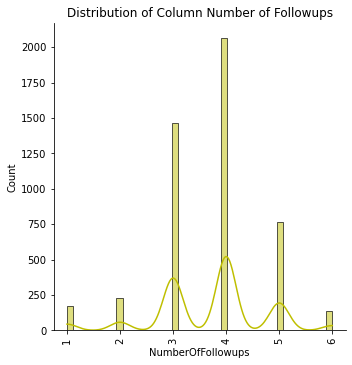

In [19]:
#Treating missing values in Number of Followups variable

print('Skewness :- ',tour['NumberOfFollowups'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['NumberOfFollowups'], kde=True, color ='y')
plt.xticks(rotation = 90)
plt.title('Distribution of Column Number of Followups')
plt.show()

In [20]:
# Imputing the missing values of Number of followups column with median
tour['NumberOfFollowups'] = tour['NumberOfFollowups'].fillna(tour['NumberOfFollowups'].median())
print('Missing Values in Number of Followups column :- ',tour['NumberOfFollowups'].isnull().sum())

Missing Values in Number of Followups column :-  0


Skewness :-  1.7520370490349106


<Figure size 1080x432 with 0 Axes>

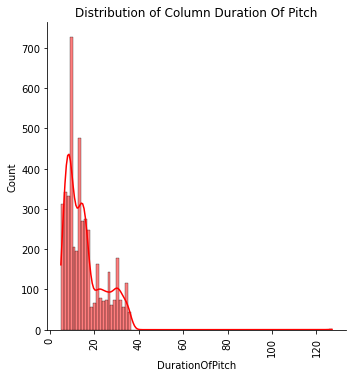

In [21]:
#Treating missing values in Duration of pitch variable

print('Skewness :- ',tour['DurationOfPitch'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['DurationOfPitch'], kde=True, color ='r')
plt.xticks(rotation = 90)
plt.title('Distribution of Column Duration Of Pitch')
plt.show()

- Duration of pitch column is highly skewed.
- Imputing the data using the mean won't be efficient.

In [22]:
print(tour.groupby(['NumberOfPersonVisiting'])['DurationOfPitch'].median())
print('-'*50,'\n',tour.groupby(['ProductPitched'])['DurationOfPitch'].median())

NumberOfPersonVisiting
1    11.0
2    13.0
3    14.0
4    15.0
5    16.0
Name: DurationOfPitch, dtype: float64
-------------------------------------------------- 
 ProductPitched
Basic           13.0
Deluxe          14.0
King            11.0
Standard        14.0
Super Deluxe    13.0
Name: DurationOfPitch, dtype: float64


- It is observed that the duration of pitch increases with number of persons visiting and also King product takes less duration time compared to other products. In this case it is not ideal to fill all the missing data of Duration of pitch column with similar median.

- Here, it is ideal to fill the missing values using group based imputation.

In [23]:
# Imputing the missing data of Duration of pitch column by using pandas 'groupby' and 'transform' functionality.
tour['DurationOfPitch'] = tour.groupby(['NumberOfPersonVisiting','ProductPitched'])['DurationOfPitch'].transform(lambda a: a.fillna(a.median()))
print('Missing Values in Duration of pitch column :- ',tour['DurationOfPitch'].isnull().sum())

Missing Values in Duration of pitch column :-  0


Skewness :-  0.8955450954235519


<Figure size 1080x432 with 0 Axes>

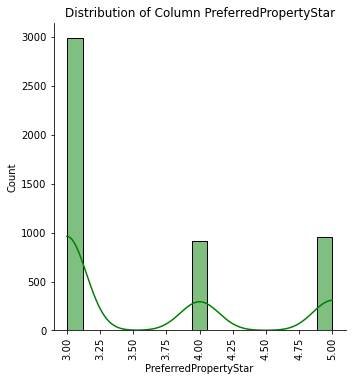

In [24]:
#Treating missing values in Preferred Property Star variable

print('Skewness :- ',tour['PreferredPropertyStar'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['PreferredPropertyStar'], kde=True, color ='g')
plt.xticks(rotation = 90)
plt.title('Distribution of Column PreferredPropertyStar')
plt.show()

In [25]:
# Imputing the missing values of Preferred Property Star column with median
tour['PreferredPropertyStar'] = tour['PreferredPropertyStar'].fillna(tour['PreferredPropertyStar'].median())
print('Missing Values in Preferred Property Star column :- ',tour['PreferredPropertyStar'].isnull().sum())

Missing Values in Preferred Property Star column :-  0


Skewness :-  1.4538837843258117


<Figure size 1080x432 with 0 Axes>

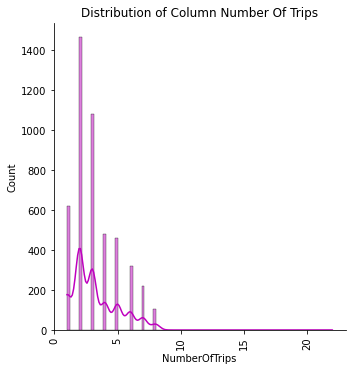

In [26]:
#Treating missing values in  Number Of Trips v ariable
print('Skewness :- ',tour['NumberOfTrips'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['NumberOfTrips'], kde=True, color ='m')
plt.xticks(rotation = 90)
plt.title('Distribution of Column Number Of Trips')
plt.show()

In [27]:
tour.groupby(['Occupation'])["NumberOfTrips"].median()

Occupation
Free Lancer       7.5
Large Business    3.0
Salaried          3.0
Small Business    3.0
Name: NumberOfTrips, dtype: float64

- Customers who work as Freelancers are taking more no.of trips compared to others, so we would fill the missing data here using group imputation

In [28]:
# Imputing the missing data of Number of trips column by using pandas 'groupby' and 'transform' functionality.
tour['NumberOfTrips'] = tour.groupby(['Occupation'])['NumberOfTrips'].transform(lambda a: a.fillna(a.median()))
print('Missing Values in Number of trips column :- ',tour['NumberOfTrips'].isnull().sum())

Missing Values in Number of trips column :-  0


Skewness :-  1.949159831766865


<Figure size 1080x432 with 0 Axes>

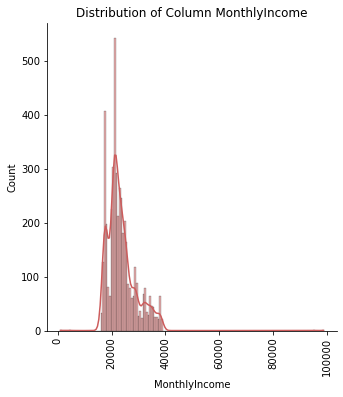

In [29]:
# Treating missing values in Monthly income variable.

print('Skewness :- ',tour['MonthlyIncome'].skew())
plt.figure(figsize=(15,6))
sns.displot(data=data, x=tour['MonthlyIncome'], kde=True, color ='indianred')
plt.xticks(rotation = 90)
plt.title('Distribution of Column MonthlyIncome')
plt.show()

-  The data in the monthly income column is highly skewed

In [30]:
print(tour.groupby(['Designation'])['MonthlyIncome'].median())
print('-'*50,'\n',tour.groupby(['MaritalStatus'])['MonthlyIncome'].median())
print('-'*50,'\n',tour.groupby(['Occupation'])['MonthlyIncome'].median())

Designation
AVP               32181.0
Executive         20689.0
Manager           22922.0
Senior Manager    26425.0
VP                34999.0
Name: MonthlyIncome, dtype: float64
-------------------------------------------------- 
 MaritalStatus
Divorced     22646.5
Married      22636.0
Single       20238.0
Unmarried    23406.0
Name: MonthlyIncome, dtype: float64
-------------------------------------------------- 
 Occupation
Free Lancer       18929.0
Large Business    21866.0
Salaried          22130.0
Small Business    22689.0
Name: MonthlyIncome, dtype: float64


- Monthly income of customers is varying significantly with customers designation
- Slight differences in monthly income of customers with different marital status, single customers have less monthly income.
- In Occupation column free lancers are having less monthly income compared to others
- From the above points, we can understand that monthly income is varying in different groups, so we cannot impute all the missing data with similar median, group based imputation is ideal under these circumstances.

In [31]:
# Imputing the missing data of Duration of pitch column by using pandas 'groupby' and 'transform' functionality.
tour['MonthlyIncome'] = tour.groupby(['Designation','MaritalStatus','Occupation'])['MonthlyIncome'].transform(lambda a: a.fillna(a.median()))
print('Missing Values in Monthly Income column :- ',tour['MonthlyIncome'].isnull().sum())

Missing Values in Monthly Income column :-  0


In [32]:
#Number of Children Visisting

# Missing values in this column may indicate that the customers didnot travel with children, so we will the missing values with '0'

tour['NumberOfChildrenVisiting'] = tour['NumberOfChildrenVisiting'].fillna(0)
print('Missing Values in Number Of Children Visiting column :- ',tour['NumberOfChildrenVisiting'].isnull().sum())

Missing Values in Number Of Children Visiting column :-  0


In [33]:
#Type of Contact

# As it is a categorical column we will impute the missing data using mode.

tour['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [34]:
tour['TypeofContact'] = tour['TypeofContact'].fillna('Self Enquiry')
print('Missing Values in Type of Contact column :- ', tour['TypeofContact'].isnull().sum())

Missing Values in Type of Contact column :-  0


In [35]:
tour.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- All missing values has been treated without the loss of any data.

### As we have age column, it would be much useful to seggregate the age column into groups to analyze and understand the customers of different age groups.

In [36]:
tour['Age'].describe()

count    4888.000000
mean       37.622265
std         9.098418
min        18.000000
25%        31.000000
50%        37.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

- Customers with minimum age is 18 & max is 61.

In [37]:
tour['Age_range'] = pd.cut(tour['Age'], bins = [17, 24, 30, 40, 50, 62], labels = ['17-24','25-30', '31-40', '41-50', '50+'])

In [38]:
tour.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40


### We can also form monthly income groups to understand about the customers of different income groups

In [39]:
tour['MonthlyIncome'].describe()

count     4888.000000
mean     23507.441796
std       5286.954790
min       1000.000000
25%      20314.000000
50%      22295.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [40]:
tour['Monthly_Income_range'] = pd.cut(tour['MonthlyIncome'], bins = [0,20000,25000, 30000, 35000, 100000], labels = ['0-20000','20001-25000', '25001-30000', '30001-35000', '>35000'])

In [41]:
tour.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range,Monthly_Income_range
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,20001-25000
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,20001-25000
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,0-20000
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,0-20000
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40,0-20000


In [42]:
#checking for missing data in new columns
tour.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Age_range                   0
Monthly_Income_range        0
dtype: int64

- Treatment of missing data is completed without any data leakage.

## Exploratory Data Analysis

### Univariate Analysis

In [43]:
# Lets look at the target variable first.

y = tour['ProdTaken']
print(f'Percentage of customers purchased the product : {round(y.value_counts(normalize=True)[1]*100,2)}% --> ({y.value_counts()[1]} customers)\nPercentage of customers did not purchased the product: {round(y.value_counts(normalize=True)[0]*100,2)}% --> ({y.value_counts()[0]} customers)')

Percentage of customers purchased the product : 18.82% --> (920 customers)
Percentage of customers did not purchased the product: 81.18% --> (3968 customers)


- 18.82% of customers (920 customers) have purchased the product

- 81.18% of customers (3968 customers) did not purchase the product

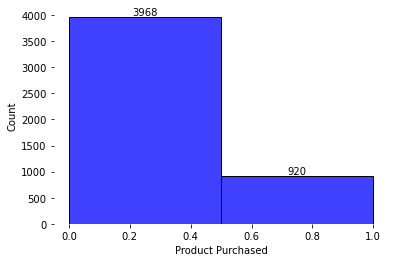

In [44]:
ax=sns.histplot(tour, x="ProdTaken", binwidth=0.5,color='b')
sns.despine(top=True,left=True,bottom=True)
plt.xlabel('Product Purchased')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [45]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   object  
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

- The columns City Tier, Passport, OwnCar are clearly binary categorical values but are mentioned as numerical values.
- We will convert to category data types

In [46]:
categorical = ['Designation','OwnCar','Passport','CityTier','MaritalStatus','ProductPitched','Gender','Occupation','TypeofContact','Age_range','Monthly_Income_range']
tour[categorical] = tour[categorical].astype('category')
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [47]:
numerical = ['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome']

#### Categorical columns

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64


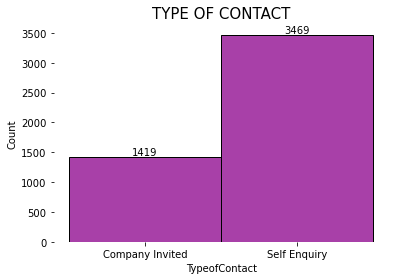

In [48]:
# Type of contact
print (tour["TypeofContact"].value_counts())
ax=sns.histplot(tour, x="TypeofContact", binwidth=0.5,color='darkmagenta')
sns.despine(top=True,left=True,bottom=True)
plt.title('TYPE OF CONTACT', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64


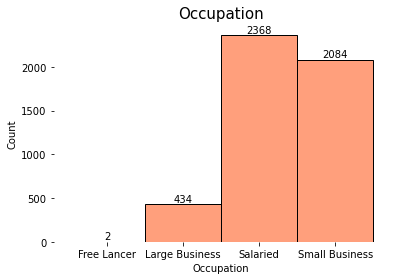

In [49]:
# Occupation
print (tour["Occupation"].value_counts())
ax=sns.histplot(tour, x="Occupation", binwidth=0.5,color='coral')
sns.despine(top=True,left=True,bottom=True)
plt.title('Occupation', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Male      2916
Female    1972
Name: Gender, dtype: int64


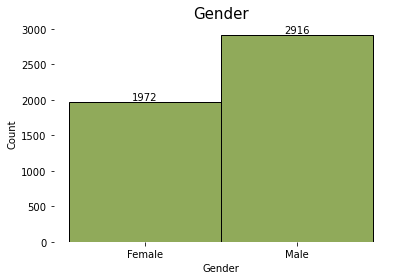

In [50]:
# Type of Gender
print (tour["Gender"].value_counts())
ax=sns.histplot(tour, x="Gender", binwidth=0.5,color='olivedrab')
sns.despine(top=True,left=True,bottom=True)
plt.title('Gender', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

1    3190
3    1500
2     198
Name: CityTier, dtype: int64


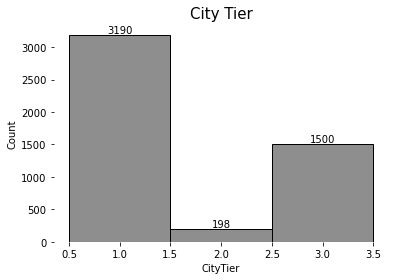

In [51]:
# City Tear
print (tour["CityTier"].value_counts())
ax=sns.histplot(tour, x="CityTier", binwidth=0.5,color='dimgrey')
sns.despine(top=True,left=True,bottom=True)
plt.title('City Tier', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64


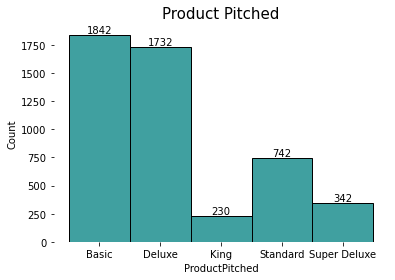

In [52]:
# Product Pitched
print (tour["ProductPitched"].value_counts())
ax=sns.histplot(tour, x="ProductPitched", binwidth=0.5,color='teal')
sns.despine(top=True,left=True,bottom=True)
plt.title('Product Pitched', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


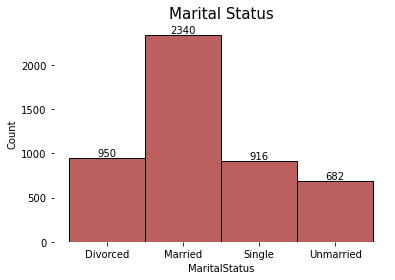

In [53]:
# Marital Status
print (tour["MaritalStatus"].value_counts())
ax=sns.histplot(tour, x="MaritalStatus", binwidth=0.5,color='brown')
sns.despine(top=True,left=True,bottom=True)
plt.title('Marital Status', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

0    3466
1    1422
Name: Passport, dtype: int64


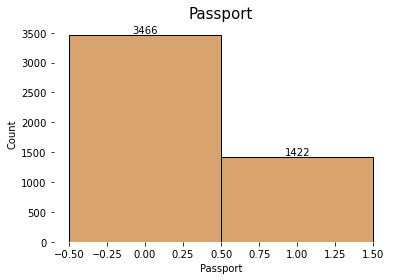

In [54]:
# Passport
print (tour["Passport"].value_counts())
ax=sns.histplot(tour, x="Passport", binwidth=0.5,color='peru')
sns.despine(top=True,left=True,bottom=True)
plt.title('Passport', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

1    3032
0    1856
Name: OwnCar, dtype: int64


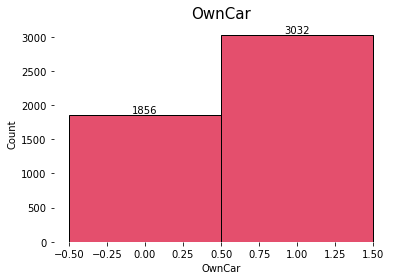

In [55]:
# Own Car
print (tour["OwnCar"].value_counts())
ax=sns.histplot(tour, x="OwnCar", binwidth=0.5,color='crimson')
sns.despine(top=True,left=True,bottom=True)
plt.title('OwnCar', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


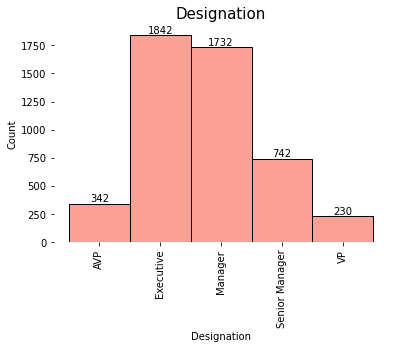

In [56]:
# Designation
print (tour["Designation"].value_counts())
ax=sns.histplot(tour, x="Designation", binwidth=0.5,color='salmon')
sns.despine(top=True,left=True,bottom=True)
plt.title('Designation', fontsize=15)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

31-40    2151
41-50    1073
25-30     842
50+       549
17-24     273
Name: Age_range, dtype: int64


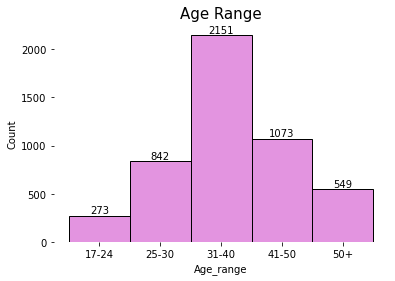

In [57]:
# Age Range
print (tour["Age_range"].value_counts())
ax=sns.histplot(tour, x="Age_range", binwidth=0.5,color='orchid')
sns.despine(top=True,left=True,bottom=True)
plt.title('Age Range', fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

20001-25000    2458
0-20000        1072
25001-30000     768
30001-35000     382
>35000          208
Name: Monthly_Income_range, dtype: int64


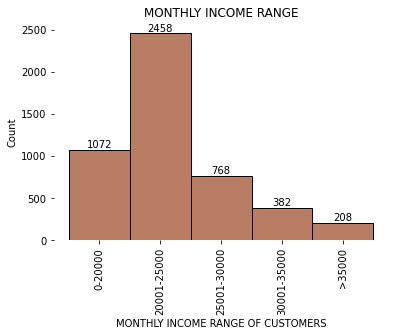

In [58]:
# Monthly Income Range
print (tour["Monthly_Income_range"].value_counts())
ax=sns.histplot(tour, x="Monthly_Income_range", binwidth=0.5,color='sienna')
sns.despine(top=True,left=True,bottom=True)
plt.xticks(rotation=90)
plt.yticks()
plt.title('MOnthly Income Range'.upper())
plt.xlabel('Monthly Income Range of Customers'.upper())
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

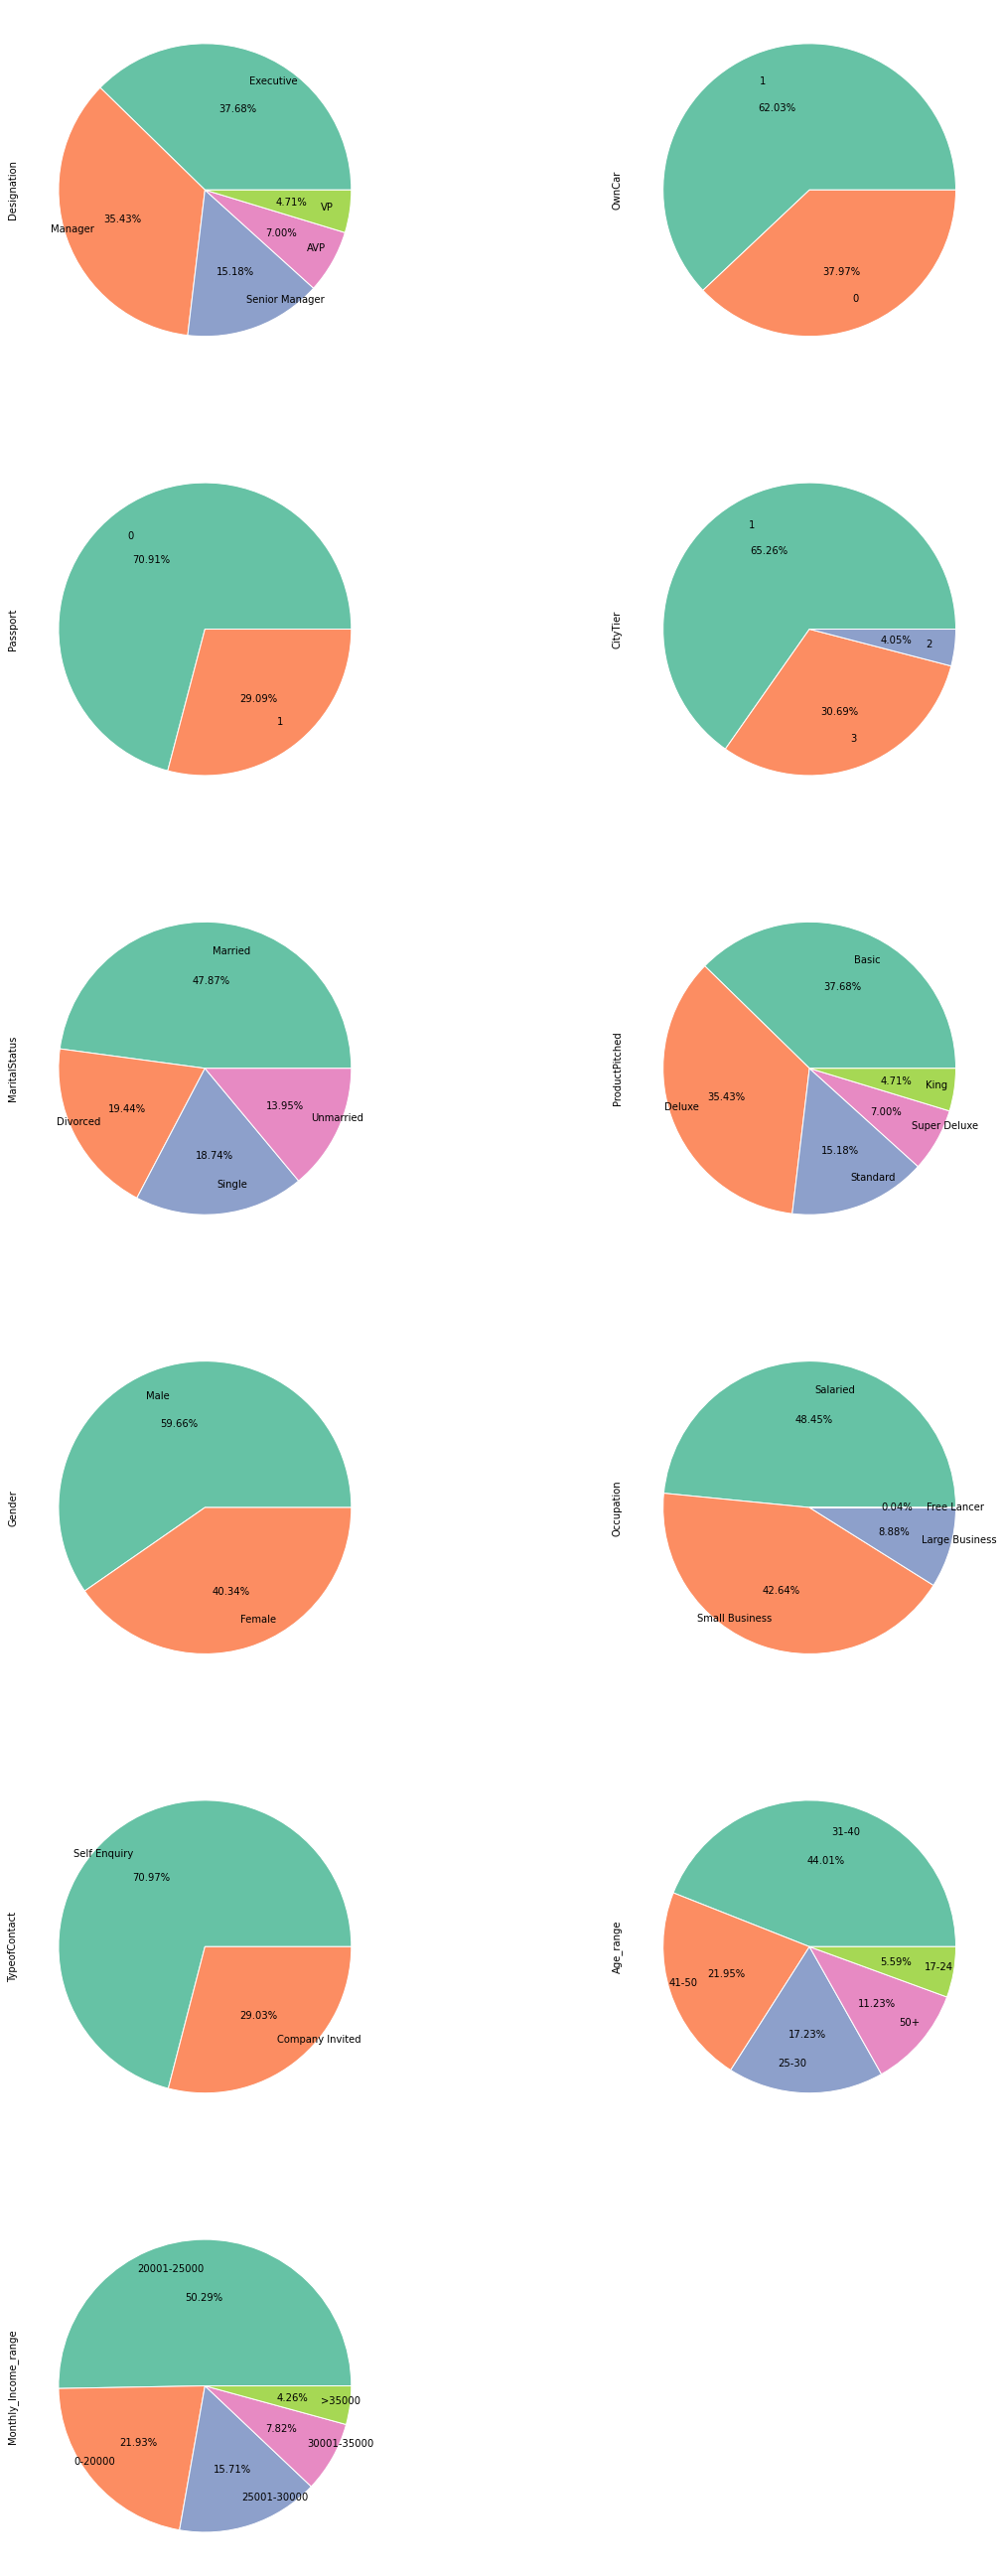

In [59]:
plt.figure(figsize=(20,80))


for i, var in enumerate(categorical):
    plt.subplot(10,2,i+1)
    sns.set_palette('Set2')
    ax=tour[var].value_counts().plot(kind='pie',autopct='%1.2f%%',labeldistance=0.8,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
    
plt.show()

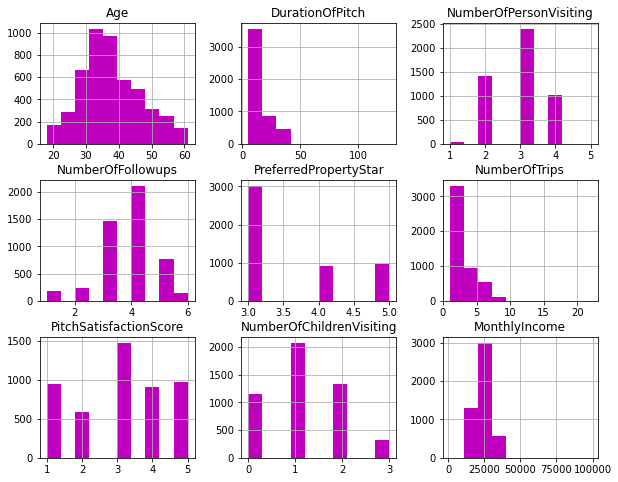

In [60]:
tour[numerical].hist(figsize=(10,8),color='m');

- As we can see numerical features are skewed 
- We need to perform scaling before building the model

### Bivariate analysism

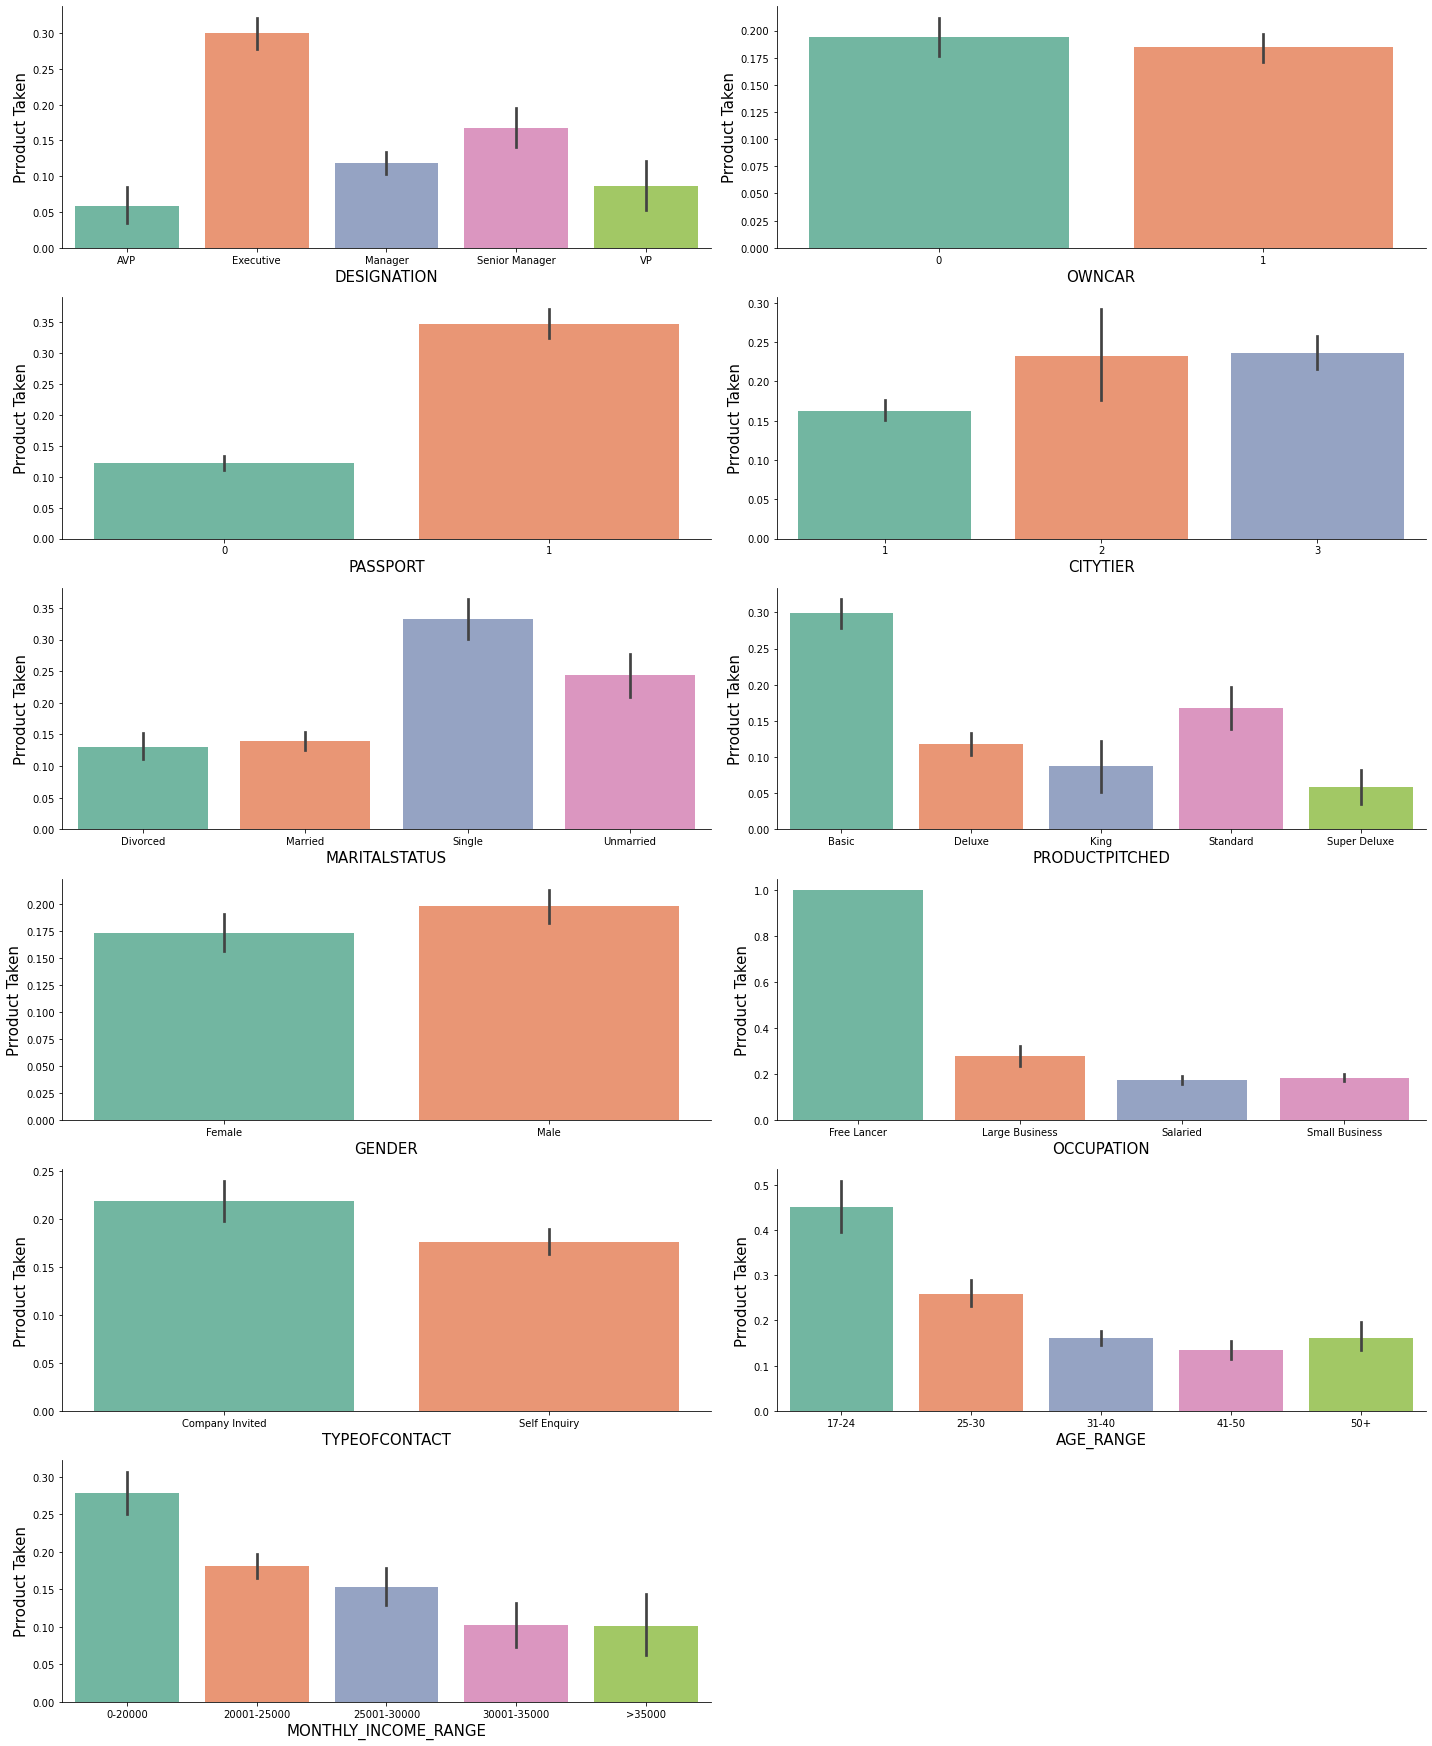

In [61]:
plt.figure(figsize=(20,40))
columns_cat = tour[categorical].columns
for i,var in enumerate(columns_cat):
    plt.subplot(10,2,i+1)
    sns.set_palette('Set2')
    ax= sns.barplot(data=tour, x=tour[categorical][var],y=tour['ProdTaken'])
    sns.despine(top=True)
    plt.tight_layout()
    plt.xlabel(columns_cat[i].upper(),fontsize=15)
    plt.ylabel('Prroduct Taken',fontsize=15) 
 
plt.show()

#### % of each category from Designation column who has purchased the product

In [62]:
print(f"Customer whose designation is executive has {round(tour[tour['Designation']=='Executive']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customer whose designation is managers has {round(tour[tour['Designation']=='Manager']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customer whose designation is senior manager has {round(tour[tour['Designation']=='Senior Manager']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customer whose designation is VP has {round(tour[tour['Designation']=='VP']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customer whose designation is AVP has {round(tour[tour['Designation']=='AVP']['ProdTaken'].mean()*100,2)} % purchased the package")

print()


Customer whose designation is executive has 29.97 % purchased the package

Customer whose designation is managers has 11.78 % purchased the package

Customer whose designation is senior manager has 16.71 % purchased the package

Customer whose designation is VP has 8.7 % purchased the package

Customer whose designation is AVP has 5.85 % purchased the package



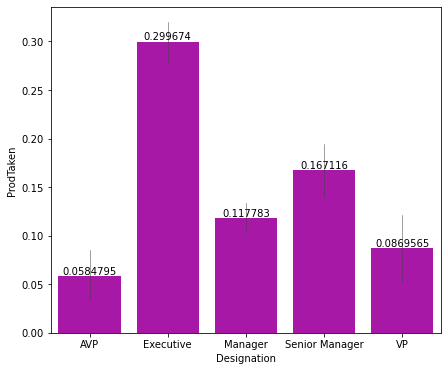

In [63]:
plt.figure(figsize=(7,6))
ax = sns.barplot(x='Designation', y='ProdTaken',
                 data=tour,color='m',
                 errwidth=0.5)
for i in ax.containers:
    ax.bar_label(i,)

### % of Male and Female customers purchasing the product

In [64]:
print(f"Male Customers {round(tour[tour['Gender']=='Male']['ProdTaken'].mean()*100,2)} % times purchased the package")

print()

print(f"Female Customers {round(tour[tour['Gender']=='Female']['ProdTaken'].mean()*100,2)} % times purchased the package")

print()

Male Customers 19.82 % times purchased the package

Female Customers 17.34 % times purchased the package



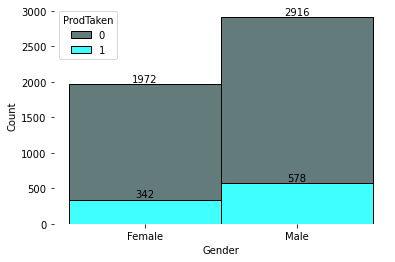

In [65]:
palette ={0: "darkslategrey", 1: "cyan"}
ax = sns.histplot(binwidth=0.5, x=tour['Gender'], hue="ProdTaken", data=tour, stat="count", multiple="stack", palette=palette)
sns.despine(top=True,left=True,bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

### % of each category from Occupation column who has purchased the product

In [66]:
print(f"Customers whose occupation is Freelancer have {round(tour[tour['Occupation']=='Free Lancer']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Salaried Customers have {round(tour[tour['Occupation']=='Salaried']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customers who own small business has{round(tour[tour['Occupation']=='Small Business']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

print(f"Customers who own large business has {round(tour[tour['Occupation']=='Large Business']['ProdTaken'].mean()*100,2)} % purchased the package")

print()

Customers whose occupation is Freelancer have 100.0 % purchased the package

Salaried Customers have 17.48 % purchased the package

Customers who own small business has18.43 % purchased the package

Customers who own large business has 27.65 % purchased the package



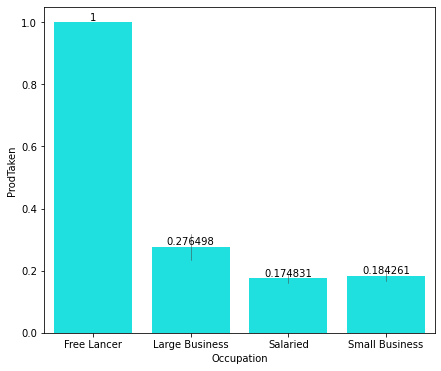

In [67]:
plt.figure(figsize=(7,6))
ax = sns.barplot(x='Occupation', y='ProdTaken',
                 data=tour,color='aqua',
                 errwidth=0.5)
for i in ax.containers:
    ax.bar_label(i,)

### % of each category from Marital Status column who have purchased the product.

In [68]:
print(f"Customers who are married  have {round(tour[tour['MaritalStatus']=='Married']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers who are single  have {round(tour[tour['MaritalStatus']=='Single']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers who are divorced  have {round(tour[tour['MaritalStatus']=='Divorced']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers who are unmarried  have {round(tour[tour['MaritalStatus']=='Unmarried']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

Customers who are married  have 13.93 % of times purchased the package

Customers who are single  have 33.19 % of times purchased the package

Customers who are divorced  have 13.05 % of times purchased the package

Customers who are unmarried  have 24.34 % of times purchased the package



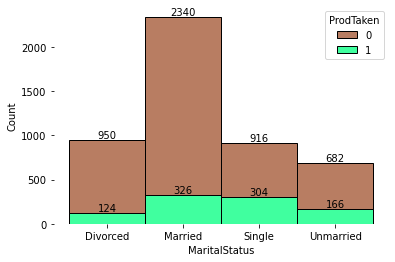

In [69]:
palette ={0: "sienna", 1: "springgreen"}
ax = sns.histplot(binwidth=0.5, x=tour['MaritalStatus'], hue="ProdTaken", data=tour, stat="count", multiple="stack", palette=palette)
sns.despine(top=True,left=True,bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

### % of each category from Age_range column who have purchased the product

In [70]:
print(f"Customers whose age falls in the range of 17-24 have {round(tour[tour['Age_range']=='17-24']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose age falls in the range of 25-30 have {round(tour[tour['Age_range']=='25-30']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose age falls in the range of 31-40 have {round(tour[tour['Age_range']=='31-40']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose age falls in the range of 41-50 have {round(tour[tour['Age_range']=='41-50']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose age is 50+ have {round(tour[tour['Age_range']=='50+']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

Customers whose age falls in the range of 17-24 have 45.05 % of times purchased the package

Customers whose age falls in the range of 25-30 have 25.89 % of times purchased the package

Customers whose age falls in the range of 31-40 have 16.09 % of times purchased the package

Customers whose age falls in the range of 41-50 have 13.42 % of times purchased the package

Customers whose age is 50+ have 16.21 % of times purchased the package



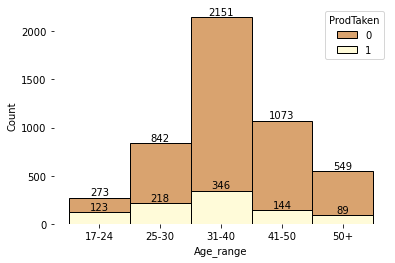

In [71]:
palette ={0: "peru", 1: "lemonchiffon"}
ax = sns.histplot(binwidth=0.5, x=tour['Age_range'], hue="ProdTaken", data=tour, stat="count", multiple="stack", palette=palette)
sns.despine(top=True,left=True,bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

- Though we have most number of customers(2151) who fall in the age range of 31-40, only 16.09% (346) of them have purchased the product.

- Even though we have only 273 customers who fall in the age range between 17-24, 45.05% of them have purchased the product

### % of each category from Monthly_income_range column who have purchased the product

In [72]:
print(f"Customers whose monthly income falls in the range of 0-20000 have {round(tour[tour['Monthly_Income_range']=='0-20000']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose monthly income falls in the range of 20001-25000 have {round(tour[tour['Monthly_Income_range']=='20001-25000']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose monthly income falls in the range of 25001-30000 have {round(tour[tour['Monthly_Income_range']=='25001-30000']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose monthly income falls in the range of 30001-35000 have {round(tour[tour['Monthly_Income_range']=='30001-35000']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

print(f"Customers whose monthly income is >35000 have {round(tour[tour['Monthly_Income_range']=='>35000']['ProdTaken'].mean()*100,2)} % of times purchased the package")

print()

Customers whose monthly income falls in the range of 0-20000 have 27.89 % of times purchased the package

Customers whose monthly income falls in the range of 20001-25000 have 18.06 % of times purchased the package

Customers whose monthly income falls in the range of 25001-30000 have 15.23 % of times purchased the package

Customers whose monthly income falls in the range of 30001-35000 have 10.21 % of times purchased the package

Customers whose monthly income is >35000 have 10.1 % of times purchased the package



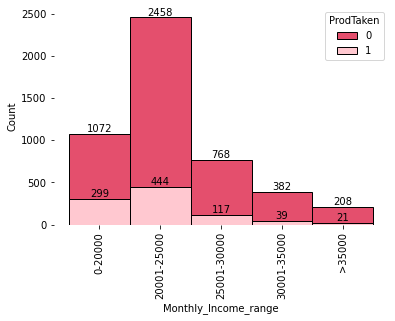

In [73]:
palette ={0: "crimson", 1: "lightpink"}
ax = sns.histplot(binwidth=0.5, x=tour['Monthly_Income_range'], hue="ProdTaken", data=tour, stat="count", multiple="stack", palette=palette)
sns.despine(top=True,left=True,bottom=True)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

### Monthly Income VS Gender 

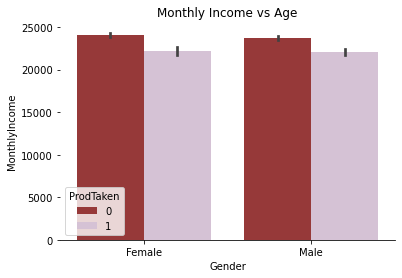

In [74]:
palette = {0: "brown", 1: "thistle"}
ax = sns.barplot(y='MonthlyIncome',x='Gender',data=tour,hue='ProdTaken',palette = palette).set_title('Monthly Income vs Age')
sns.despine(top=True,right=True,left=True)

### Monthly Income VS Occupation

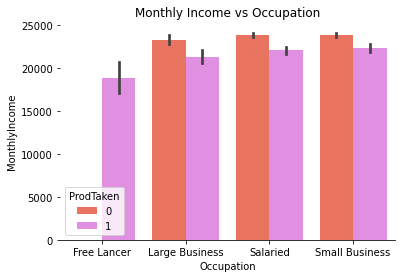

In [75]:
palette = {0: "tomato", 1: "violet"}
ax = sns.barplot(y='MonthlyIncome',x='Occupation',data=tour,hue='ProdTaken',palette = palette).set_title('Monthly Income vs Occupation')
sns.despine(top=True,right=True,left=True)

### Preferred Property Star - Monthly Income Range

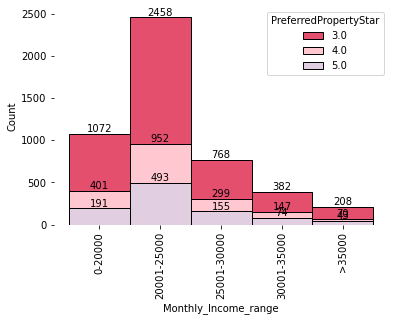

In [76]:
palette ={3.0: "crimson", 4.0: "lightpink",5.0:"thistle"}
ax = sns.histplot(binwidth=0.5, x=tour['Monthly_Income_range'], hue="PreferredPropertyStar", data=tour, stat="count", multiple="stack", palette=palette)
sns.despine(top=True,left=True,bottom=True)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

### Number of Person Visiting Vs Number of Children Visiting

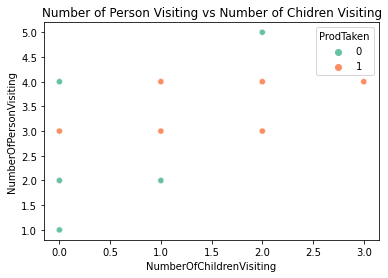

In [77]:
ax = sns.scatterplot(y='NumberOfPersonVisiting',x='NumberOfChildrenVisiting',data=tour,hue='ProdTaken').set_title('Number of Person Visiting vs Number of Chidren Visiting')

- We can observe a linear relationship between NumberOfPersonVisiting and NumberOfChildrenVisiting columns

### Age vs Monthly Income

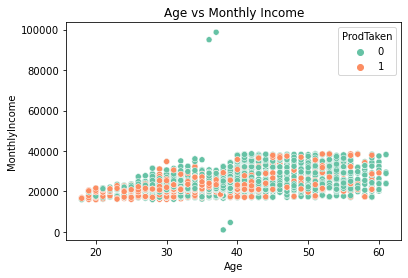

In [78]:
ax = sns.scatterplot(y='MonthlyIncome',x='Age',data=tour,hue='ProdTaken').set_title('Age vs Monthly Income')

- The above plot doesn't show a linear relationship between  Age and MonthlyIncome

### Multi-Variate Analysis

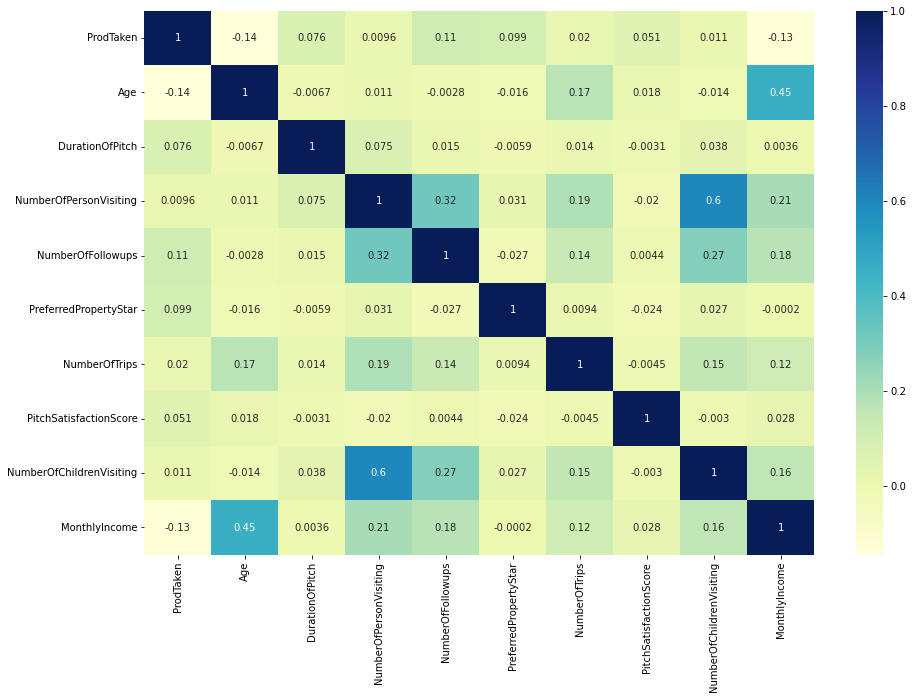

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(tour.corr(), cmap="YlGnBu", annot=True) 
plt.show()

- From the above heatmap we can observe that there exists a correlation between NumberOfPersonVisiting & NumberOfChildrenVisiting columns and also Age column exhibits a weak correlation with MonthlyIncome column

### Observations from EDA

- Out of all customers only 18.82% of the customers have purchased the product
- Most of Our customers are salaried customers followed by customers who own small business
- Company has more Male customers than Female customers
- Basic product is the most pitched product followed by Delux product. This makes sense as most of our customers fall under monthly income range of <30,000.
- We have more  number of married customers than customers who are single, divorced and unmarried.
- Most of our customers don't own a passport.Curating them a specialised travel package within the country makes them purchase the product.
- Most of our customers designation is executive.
- Most of our customers fall in the age range of 31-40
- Majority of our Customers have monthly income in the range of 20000 - 250000
- Of all the customers whose designation is executive, 29.97% of them purchased the product
- 19.82 % of Male Customers purchased the package , 17.34 % of female customers purchased the package
- Free lancers have 100 % purchased the product, but the data has only two customers who are Free Lancers so we can't conclude on that, 27.65% of Large business owners have purchased the product
- Though we have huge number of married customers only 13.93% of them has purchased the product. 33.19% of Single customers have purchased  the product
- 45.05% of the customers whose age falls in the range of 17-24 have purchased the project.
- Out of all the customers whose  monthly income is <20000, 27.89% of them has purchased the product
- Gender and Owning a car has no major significance.
- We can observe a linear relationship between NumberOfPersonVisiting and NumberOfChildrenVisiting columns
- Scatter plot between  Age and MonthlyIncome doesn't show a linear relationship.
- From the above heatmap we can observe that there exists a correlation between NumberOfPersonVisiting &     NumberOfChildrenVisiting columns and also Age column exhibits a weak correlation with MonthlyIncome column

### Metric of importance

In [80]:
# Dependence between categorical variable and target variable can be measured using mutual info score
# Higher the mutual information value higher the dependency
# Higher the mutual info score implies that we can get the better prediction on the target variable.

from sklearn.metrics import mutual_info_score
def mut_info_cat(series):
    return mutual_info_score(series, tour['ProdTaken']) 

tour_cat_score = tour[categorical].apply(mut_info_cat) 
tour_cat_score = tour_cat_score.sort_values(ascending=False).to_frame(name='score') 
tour_cat_score

,score
Passport,0.031485
ProductPitched,0.027097
Designation,0.027097
MaritalStatus,0.018542
Age_range,0.016238
Monthly_Income_range,0.009541
CityTier,0.003813
Occupation,0.003041
TypeofContact,0.001198
Gender,0.000487


- From the observation can't see any significant dependency between categorical variables and dependent variable
- We will look more into it while building the model.

In [81]:
tour.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_range',
       'Monthly_Income_range'],
      dtype='object')

In [82]:
# ProdTaken is a categorical column but it is in the form of numerical so we have to convert that into category dtype
tour['ProdTaken'] = tour['ProdTaken'].astype('category')

In [83]:
#Outlier Detection
Q1 = tour.quantile(0.25)     
Q3 = tour.quantile(0.75)

IQR = Q3 - Q1
lower=Q1-1.5*IQR            
upper=Q3+1.5*IQR

In [84]:
((tour.select_dtypes(include=['float64','int64'])<lower) | (tour.select_dtypes(include=['float64','int64'])>upper)).sum()/len(tour)*100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
PitchSatisfactionScore      0.000000
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.303601
dtype: float64

- As we wont be having customer interaction information for new customers and potential customers, we need not to be worried about customer interaction columns and focus mainly in dealing with the outliers in NumberOfTrips and MonthlyIncome columns

In [85]:
tour['NumberOfTrips'].describe()

count    4888.000000
mean        3.229746
std         1.822769
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64

- It seems that we have extreme values in Number of trips column as there is a huge difference between 75% value and max value

In [86]:
# Checking for outlier values in Number of trips column
tour.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range,Monthly_Income_range
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,...,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,31-40,25001-30000
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,...,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,31-40,20001-25000
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,...,Single,20.0,1,4,1,2.0,Executive,20963.0,31-40,20001-25000
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,...,Single,19.0,1,4,1,1.0,Executive,17285.0,25-30,0-20000
3155,1,30.0,Self Enquiry,1,17.0,Salaried,Female,4,5.0,Basic,...,Single,8.0,1,5,1,2.0,Executive,21082.0,25-30,20001-25000


- We can observe that last four values are extreme values in Number of trips column

In [87]:
# Dropping outliers from the number of trips column, as these outliers affect the ml model
# we have 4 outliers in this column
tour.drop(index=tour[tour.NumberOfTrips>10].index,inplace=True)

- Removed outliers from Number of trips column

In [88]:
tour['MonthlyIncome'].describe()

count     4884.000000
mean     23509.190315
std       5288.113045
min       1000.000000
25%      20314.000000
50%      22297.500000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

- There is a huge difference between min value and 25% value, Also there is a big difference between 75% value and max value

In [89]:
# Cheking for outliers in Monthly Income column
tour.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range,Monthly_Income_range
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,31-40,>35000
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,31-40,>35000
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Married,2.0,0,1,1,3.0,VP,38677.0,50+,>35000
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Divorced,2.0,0,2,1,2.0,VP,38677.0,50+,>35000
4660,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,...,Married,3.0,0,4,1,2.0,VP,38651.0,41-50,>35000


- Here we have two outliers which are way above 39000

In [90]:
tour.sort_values(by=["MonthlyIncome"]).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range,Monthly_Income_range
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,...,Single,4.0,1,5,0,0.0,Manager,1000.0,31-40,0-20000
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,...,Single,5.0,1,5,0,1.0,Manager,4678.0,31-40,0-20000
1983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,...,Single,2.0,1,5,1,1.0,Executive,16009.0,17-24,0-20000
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,...,Single,2.0,1,5,0,0.0,Executive,16009.0,17-24,0-20000
727,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,Basic,...,Single,2.0,0,2,1,1.0,Executive,16051.0,17-24,0-20000


- We have two outliers here as well which are way lower than 15000

In [91]:
# We have a total of 4 outliers in MonthlyIncome column
# Removing these four outliers
tour.drop(index=tour[(tour.MonthlyIncome>40000) | (tour.MonthlyIncome<12000)].index,inplace=True)

In [92]:
tour['DurationOfPitch'].describe()

count    4880.000000
mean       15.378689
std         8.319681
min         5.000000
25%         9.000000
50%        13.000000
75%        19.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

- Max value and 75% value has a huge difference

In [93]:
tour.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_range,Monthly_Income_range
3878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,...,Married,4.0,0,1,1,2.0,Executive,22160.0,50+,20001-25000
1434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,...,Married,3.0,0,1,1,1.0,Executive,18482.0,31-40,0-20000
4113,0,39.000000,Self Enquiry,1,36.0,Large Business,Male,3,4.0,Deluxe,...,Married,5.0,0,1,0,1.0,Manager,24939.0,31-40,20001-25000
4118,1,39.000000,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,...,Married,2.0,1,3,1,3.0,Manager,25351.0,31-40,25001-30000
3481,0,46.000000,Self Enquiry,1,36.0,Large Business,Male,3,4.0,Standard,...,Divorced,6.0,1,5,1,1.0,Senior Manager,28058.0,41-50,25001-30000


- We have two outliers in this column Duration of Pitch

In [94]:
# removing these 2 outliers from this column
tour.drop(index=tour[tour.DurationOfPitch>37].index,inplace=True)

- All the outliers has been successfully treated

#### Defining X and Y variables

In [95]:
X = tour.drop('ProdTaken',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = tour['ProdTaken']

In [96]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [97]:
len(X_train),len(X_test),len(y_train),len(y_test)

(3902, 976, 3902, 976)

### Building Baseline model

- I chose to use logistic Regression as a baseline model. As Logistic Regression is a very simple and it is convinient for binary classification problem like in this case we are considering

In [98]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Training Accuracy =  83.44  %
Testing Accuracy =  82.79  %


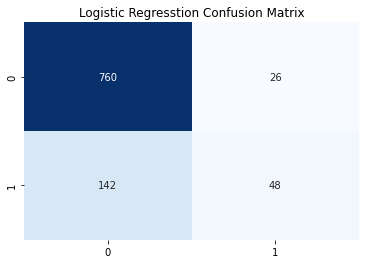

In [99]:
#Model Evaluation

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');

In [100]:
print("The accracy of the model is: {0}%".format(accuracy_score(y_test,y_pred)*100))
print('Classification Report of the BaseLine model LR:','\n\n',classification_report(y_test,y_pred))

The accracy of the model is: 82.78688524590164%
Classification Report of the BaseLine model LR: 

               precision    recall  f1-score   support

           0       0.84      0.97      0.90       786
           1       0.65      0.25      0.36       190

    accuracy                           0.83       976
   macro avg       0.75      0.61      0.63       976
weighted avg       0.80      0.83      0.80       976



The above baseline Logistic Regression model with 83% accuracy is a good model if you want to predict that someone will not buy the product(Which mean for ProdTaken == 0 its a good model) as f1-Score and recall value for ProdTaken = 0 is very high. However, the model is not very good if you want to predict that someone will purchase the product (Which mean for ProdTaken == 1 its not a good model) as the f1-score, recall both are very low. 

This has happend bcoz your taining data set have more data points where ProdTaken == 0 then compare to ProdTaken == 1. 

In [101]:
#  checking for imbalanced target class:

tour['ProdTaken'].value_counts()

0    3960
1     918
Name: ProdTaken, dtype: int64

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

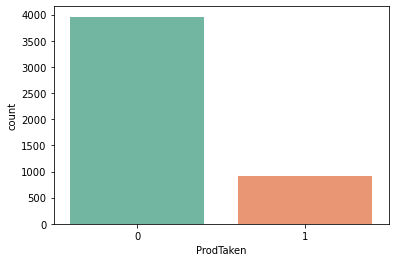

In [102]:
sns.countplot(tour['ProdTaken'])

- Our Target class is clearly imbalanced

In [103]:
# Import the library
from imblearn.over_sampling import SMOTE
from collections import Counter

In [104]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using smote
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 3174, 1: 728})
After Counter({0: 3174, 1: 3174})


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

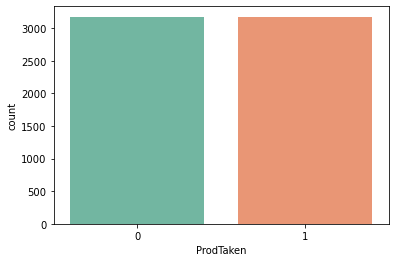

In [105]:
sns.countplot(y_train_sm)

- We can observe that the target class is now  balanced

In [106]:
#Let build a new model with this balanced ProdTaken column

lr2 = LogisticRegression(solver='liblinear')
model1 = lr2.fit(X_train_sm,y_train_sm)

Training Accuracy =  85.74  %
Testing Accuracy =  82.79  %


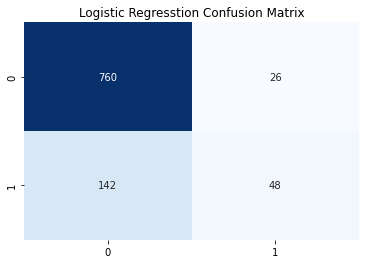

In [107]:
#Model Evaluation

y_pred1 = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr2_train_acc = round(accuracy_score(y_train_sm,model1.predict(X_train_sm))*100,2)
lr2_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr2_train_acc,' %')
print('Testing Accuracy = ' , lr2_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');

In [108]:
print('Classification Report of the BaseLine model LR:','\n\n',classification_report(y_test,y_pred1))

Classification Report of the BaseLine model LR: 

               precision    recall  f1-score   support

           0       0.87      0.91      0.89       786
           1       0.55      0.43      0.48       190

    accuracy                           0.82       976
   macro avg       0.71      0.67      0.69       976
weighted avg       0.81      0.82      0.81       976



- Though the recall values are slightly improved, it is still not a good model

### Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train_sm)

X_test_scaled = sc.transform(X_test)

In [110]:
model2 = LogisticRegression(random_state=0)
model2.fit(X_train_scaled,y_train_sm)

LogisticRegression(random_state=0)

In [111]:
y_pred2 = model2.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred2)
print("Confusion matrix: ")
print(cm)

print("The accracy of the model is: {0}%".format(accuracy_score(y_test,y_pred2)*100))

Confusion matrix: 
[[720  66]
 [110  80]]
The accracy of the model is: 81.9672131147541%


In [112]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       786
           1       0.55      0.42      0.48       190

    accuracy                           0.82       976
   macro avg       0.71      0.67      0.68       976
weighted avg       0.81      0.82      0.81       976



- Logistic Regression is not performing well, we will move on to other ml models

### Model Models building and comparisions

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [114]:

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB())) 
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       786
           1       0.55      0.42      0.48       190

    accuracy                           0.82       976
   macro avg       0.71      0.67      0.68       976
weighted avg       0.81      0.82      0.81       976

LR: 0.851467
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       786
           1       0.58      0.36      0.45       190

    accuracy                           0.83       976
   macro avg       0.72      0.65      0.67       976
weighted avg       0.81      0.83      0.81       976

LDA: 0.842492
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       786
           1       0.69      0.46      0.56       190

    accuracy                           0.86       976
   macro avg       0.79      0.71      0.73       976
weighted avg       0.84      0.86      0.84    

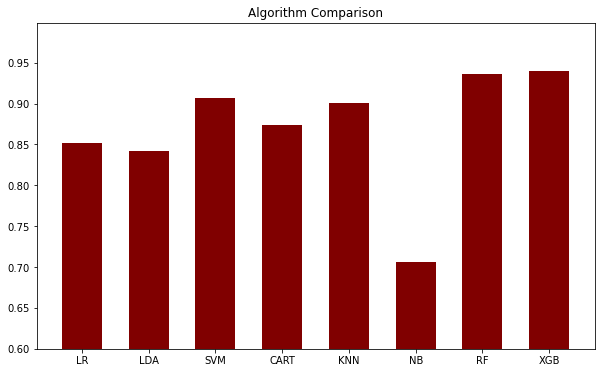

In [115]:
result = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train_scaled, y_train_sm, cv=kfold, scoring='accuracy')
    clf = model.fit(X_train_scaled, y_train_sm)
    y_pred = clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    result.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f'%(name,cv_results.mean()))
  

plt.figure(figsize=(10, 6))
plt.ylim(.6000, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()
     

- SVM, KNN & Random Forest models are showing better accuracy but better accuracy is not our goal, we need a model that also gives good precision and recall values

# Hyper parameter tuning 

- Will try to perform hyper parameter tuning on models which are performing better

##### Parameter tuning SVM


In [116]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_scaled, y_train_sm) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   3.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   4.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   5.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   4.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   3.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.564 total time=   2.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   3.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   3.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   3.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.862 total time=   3.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.586 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.775 total time=   5.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.821 total time=   4.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.806 total time=   4.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.807 total time=   5.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.752 total time=   2.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.960 total time=   4.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.977 total time=   3.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.968 total time=   3.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=   3.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.751 total time=   1.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.944 total time=   2.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.959 total time=   2.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [117]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [118]:
grid_predictions = grid.predict(X_test_scaled) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       786
           1       0.92      0.68      0.79       190

    accuracy                           0.93       976
   macro avg       0.93      0.84      0.87       976
weighted avg       0.93      0.93      0.92       976



#### SVM model is performing much better after parameter tuning, especially in case of class 1 precision, recall and f1 scores

#### Hyper parameter tuning KNN

In [119]:
grid_params_knn = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=3, n_jobs = -1) 
  
# fitting the model for grid search 
grid_knn.fit(X_train_scaled, y_train_sm) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [120]:
# print best parameter after tuning 
print(grid_knn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_knn.best_estimator_) 

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', weights='distance')


In [121]:
# using the best hyperparameters
knn_tuned = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
knn_tuned.fit(X_train_scaled, y_train_sm)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [122]:
knn_tuned_predictions = knn_tuned.predict(X_test_scaled) 
  
# print classification report 
print(classification_report(y_test, knn_tuned_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       786
           1       0.75      0.64      0.69       190

    accuracy                           0.89       976
   macro avg       0.83      0.79      0.81       976
weighted avg       0.88      0.89      0.88       976



#### KNN is now performing better than its previous version with no tuning

#### Hyper parameter tuning Decision Tree

In [123]:
params_tree = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid=params_tree, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search_tree.fit(X_train_scaled, y_train_sm)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [124]:
# print best parameter after tuning 
print(grid_search_tree.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_tree.best_estimator_) 

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)


In [125]:
# using the best hyperparameters
tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=42)
tree_tuned.fit(X_train_scaled, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [126]:
tree_tuned_pred = tree_tuned.predict(X_test_scaled) 
  
# print classification report 
print(classification_report(y_test, tree_tuned_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       786
           1       0.59      0.53      0.56       190

    accuracy                           0.84       976
   macro avg       0.74      0.72      0.73       976
weighted avg       0.83      0.84      0.83       976



#### The performance of decision tree has gotten down a bit after tuning the default parameters are better in this model

#### Hyper parameter tuning Random Forest

In [127]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf_rf = GridSearchCV(RandomForestClassifier(), forest_params, cv = 10, scoring='accuracy')

clf_rf.fit(X_train_scaled, y_train_sm)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [130]:
# print best parameter after tuning 
print(clf_rf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf_rf.best_estimator_) 

{'max_depth': 14, 'max_features': 8}
RandomForestClassifier(max_depth=14, max_features=8)


In [131]:
clf_grid_rf = RandomForestClassifier(max_depth=14, 
                                    max_features=8,) 
clf_grid_rf.fit(X_train_scaled, y_train_sm) 
y_pred_clf_rf =clf_grid_rf.predict(X_test_scaled) 
print(classification_report(y_pred_clf_rf, y_test)) 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       854
           1       0.53      0.83      0.65       122

    accuracy                           0.89       976
   macro avg       0.75      0.86      0.79       976
weighted avg       0.92      0.89      0.90       976



#### Though the recall score has been significantly increased but overall the rabdom forest model with default parameters has performed better in comparision to parameter tuned random forest model

In [132]:
params_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_xgb = GridSearchCV(XGBClassifier(), param_grid=params_xgb, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_xgb.fit(X_train_scaled, y_train_sm) 


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.586 total time=   0.3s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.931 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.965 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.960 total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.969 total time=   0.3s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.594 total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.931 total time=   0.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_dept

[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.609 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.967 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.968 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.968 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.602 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.966 total time=

[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.940 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.972 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.965 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.974 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.587 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.924 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.965 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.965 total time=   0

[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.966 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.970 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.601 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.929 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.968 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.968 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.973 total time=   0.1s
[CV 1/5]

[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.967 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.970 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.603 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.938 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.961 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.964 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.974 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.580 total time=   0.1s

[CV 4/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.962 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.968 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.594 total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.922 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.970 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.968 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.587 total time=

[CV 4/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.964 total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.968 total time=   0.2s
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.603 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.937 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.965 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.969 total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.974 total time=   0.2s
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.588 tot

[CV 1/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.598 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.923 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.961 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.964 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.965 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.597 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.926 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.1s
[CV 4/5]

[CV 3/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.965 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.964 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.592 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.965 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.963 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.965 total time=   0.1s


[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.954 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.573 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.917 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.951 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.954 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.571 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.909 total time=   0.1s
[CV 3/5]

[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.579 total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.913 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.946 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.953 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.586 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.915 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.962 total time=   0.1s


[CV 2/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.941 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.974 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.970 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.976 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.607 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.943 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.968 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.976 total time=

[CV 2/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.940 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.973 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.971 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.979 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.598 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.927 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.960 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.964 total t

[CV 4/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.967 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.976 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.607 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.946 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.969 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.975 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.973 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.590 total time=   0.1s
[CV 2/5]

[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.970 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.602 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.928 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.975 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.964 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.975 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.605 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.934 total time=   0.2s
[CV 3/

[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.940 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.973 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.967 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.972 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.594 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.939 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.963 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.967 total time=

[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.939 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.970 total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.972 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.970 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.605 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.928 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.969 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.962 total time=

[CV 3/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.954 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.957 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.955 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.595 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.939 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.967 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.967 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.1s
[CV 1

[CV 4/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.965 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.599 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.932 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.971 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.968 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.969 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.605 total time=   0.0s
[CV 2/5]

[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.576 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.912 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.957 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.946 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.946 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.579 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.912 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.954 total time=   0.0s
[CV

[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.921 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.953 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.950 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.580 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.914 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.966 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.955 total time=   0.1s
[CV 5/5]

[CV 4/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.960 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.583 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.932 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.968 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.962 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.964 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.626 tota

[CV 4/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.974 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.983 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.626 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.942 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.974 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.968 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.979 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.635 total time=

[CV 1/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.596 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.924 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.963 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.965 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.963 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.578 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.924 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.965 total time=   0.1s


[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.976 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.974 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.623 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.950 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.971 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.965 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.976 total time=   0.1s
[CV 1/5]

[CV 5/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.960 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.589 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.921 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.964 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.964 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.964 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.586 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.920 tot

[CV 1/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.610 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.944 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.958 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.976 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.624 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.939 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.973 total time=

[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.920 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.959 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.959 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.965 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.586 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.926 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.958 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.956 total time=   0.1s


[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.968 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.976 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.609 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.928 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.971 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.955 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.969 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.596 total time=   0.1s
[CV 2/5]

[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.945 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.580 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.912 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.953 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.949 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.576 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.908 total time=   0.0s
[

[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.583 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.914 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.959 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.956 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.960 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.594 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.911 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.958 total time=   0.0s
[CV 4/5]

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [134]:
# print best parameter after tuning 
print(grid_xgb.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_xgb.best_estimator_) 

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [135]:
grid_xgb_predictions = grid_xgb.predict(X_test_scaled) 
  
# print classification report 
print(classification_report(y_test, grid_xgb_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       786
           1       0.83      0.64      0.72       190

    accuracy                           0.90       976
   macro avg       0.88      0.80      0.83       976
weighted avg       0.90      0.90      0.90       976



#### XGBoost model with default parameters has performed way better than this model

#### Hyperparameter Tuning doesn’t work all the time. Sometimes the Default parameters are also considered to be the best estimators like in this case

In [138]:
# Better performing XGBoost model
model_xgb = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_result = cross_val_score(model_xgb, X_train_scaled, y_train_sm, cv=kfold, scoring='accuracy')
clf_xgb = model_xgb.fit(X_train_scaled, y_train_sm)
y_pred_xgb = clf_xgb.predict(X_test_scaled)
print(cv_result.mean())
print(classification_report(y_pred_xgb,y_test))

0.9401537544400009
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       821
           1       0.74      0.91      0.82       155

    accuracy                           0.94       976
   macro avg       0.86      0.92      0.89       976
weighted avg       0.94      0.94      0.94       976



- This model is much  more balanced and better performing than  other models

In [139]:
feature_names = X_train.columns
importances = clf_xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(clf_xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                       Imp
MaritalStatus_Married             0.154118
Age_range_50+                     0.098289
PreferredPropertyStar             0.069484
NumberOfFollowups                 0.054043
ProductPitched_Deluxe             0.051174
ProductPitched_Super Deluxe       0.044979
Age_range_41-50                   0.042086
Occupation_Large Business         0.036304
Occupation_Small Business         0.034679
Age_range_25-30                   0.034286
Designation_Executive             0.032864
Occupation_Salaried               0.032004
Age_range_31-40                   0.029839
NumberOfChildrenVisiting          0.028995
Passport_1                        0.028648
Monthly_Income_range_30001-35000  0.027660
ProductPitched_King               0.017879
ProductPitched_Standard           0.016386
TypeofContact_Self Enquiry        0.016354
OwnCar_1                          0.013491
Monthly_Income_range_25001-30000  0.013075
CityTier_3                        0.013033
NumberOfTri

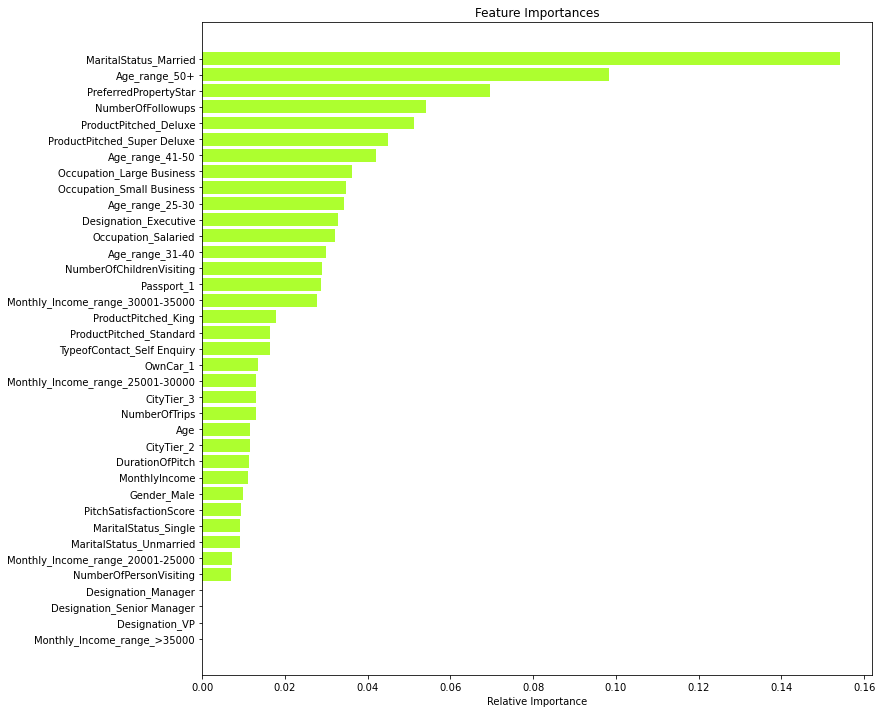

In [140]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='greenyellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [141]:
clf_xgb.predict(X_test_scaled)[13]

1

### Building model with important features

In [142]:
X = tour[['Age','MaritalStatus','DurationOfPitch','NumberOfChildrenVisiting','NumberOfPersonVisiting','NumberOfFollowups','MonthlyIncome','Occupation','PreferredPropertyStar']]
X = pd.get_dummies(X,drop_first=True)
y = tour['ProdTaken']

In [143]:
X.columns

Index(['Age', 'DurationOfPitch', 'NumberOfChildrenVisiting',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'MonthlyIncome',
       'PreferredPropertyStar', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business'],
      dtype='object')

In [144]:
X.rename(columns = {'Occupation_Large Business':'Occupation_Large_Business', 'Occupation_Small Business':'Occupation_Small_Business',}, 
         inplace = True)

In [145]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [146]:
len(X_train),len(X_test),len(y_train),len(y_test)

(3902, 976, 3902, 976)

In [147]:
#SMOTE
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using smote
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 3174, 1: 728})
After Counter({0: 3174, 1: 3174})


In [148]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [149]:
# Better performing XGBoost model
model_xb = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=None)
result_cv = cross_val_score(model_xb, X_train, y_train, cv=kfold, scoring='accuracy')
clf_xb = model_xb.fit(X_train, y_train)
y_pred_xb = clf_xb.predict(X_test)
print(result_cv.mean())
print('Accuracy score of the model:', round(accuracy_score(y_pred_xb,y_test)*100,2))

0.9078668123897762
Accuracy score of the model: 86.07


Predicting some test data

In [150]:
prod_pred =clf_xb.predict(X_test)[11]

if (prod_pred == 0):
    print('Customer not purchased the product')
else:
    print('Customer purchased the product')

Customer not purchased the product


In [151]:
n = [[41,6.00,0,3,3,20993,3,0,1,0,0,1,0]]
prod_pred1 = clf_xb.predict(n)
if (prod_pred1 == 0):
    print('Customer not purchased the product')
else:
    print('Customer purchased the product')

Customer purchased the product


In [163]:
import pickle
pickle.dump(clf_xb, open('xgb_model1.pkl','wb'))